# 데이터셋 불러오기

In [1]:
import pandas as pd

data = pd.read_csv("./PUBG_data.csv")
# 랜덤 셔플
data = data.sample(frac=1).reset_index(drop=True)

데이터 확인하기

In [2]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,00115778551089,a434a1b63483a0,0131033622536a,0,0,0.00,0,0,0,60,...,0,0.0,0,0.0,0,0,47.14,1,1504,0.4828
1,3d860732ebbd61,bc210ea3cb8f0d,2116051f947c60,0,0,0.00,0,0,0,47,...,0,0.0,0,0.0,0,0,1810.00,2,0,0.7500
2,cd8aa048521565,54a8f30b80991a,05fb9b535f070b,0,5,112.40,0,0,3,43,...,0,0.0,0,0.0,0,0,1417.00,5,0,0.8316
3,cd7136dccfc8e2,645bd6b5e439a4,0bdc1a4eb52a4a,0,0,40.19,0,0,1,57,...,1,1685.0,0,0.0,0,0,1254.00,6,0,0.3704
4,9e9d5cfce9f828,d168110538c618,08768097350c90,0,0,0.00,0,0,0,94,...,0,0.0,0,0.0,0,0,5.81,1,1470,0.0000


NaN 값 확인

In [3]:
data.isnull().any()

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool

NaN 있는 행 제거

In [4]:
data = data.dropna(axis=0)

데이터 type, shape 확인하기

In [5]:
data.info()
print("Shape of dataset: ", data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759458 entries, 0 to 759458
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               759458 non-null  object 
 1   groupId          759458 non-null  object 
 2   matchId          759458 non-null  object 
 3   assists          759458 non-null  int64  
 4   boosts           759458 non-null  int64  
 5   damageDealt      759458 non-null  float64
 6   DBNOs            759458 non-null  int64  
 7   headshotKills    759458 non-null  int64  
 8   heals            759458 non-null  int64  
 9   killPlace        759458 non-null  int64  
 10  killPoints       759458 non-null  int64  
 11  kills            759458 non-null  int64  
 12  killStreaks      759458 non-null  int64  
 13  longestKill      759458 non-null  float64
 14  matchDuration    759458 non-null  int64  
 15  matchType        759458 non-null  object 
 16  maxPlace         759458 non-null  int6

# Feature Engineering

### Players Joined

배틀 그라운드에서는 한 매치에서 100명이하의 팀원들이 참가한다. 즉, 꼭 100명이 참가하지 않아도 매치가 시작된다. 

만약 100명이 참여한 매치에서 70등한 것이랑, 70명이 참여한 매치에서 70등한 것은 실력의 정도가 다르다. 따라서 매치에 참여한 플레이어 수는 중요한 feature가 될 것이다. 

"playersJoined" column을 새로 생성한다.

0         90
1         98
2         96
3         93
4         95
          ..
759454    88
759455    97
759456    94
759457    96
759458    91
Name: playersJoined, Length: 759458, dtype: int64


c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


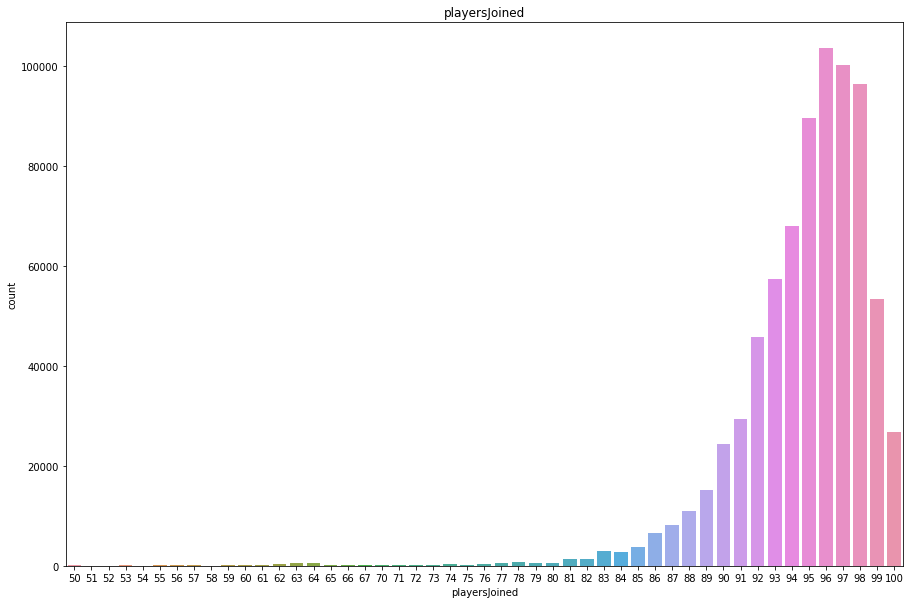

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

data['playersJoined'] = data.groupby('matchId')['matchId'].transform('count')
print(data["playersJoined"])
plt.figure(figsize=(15,10))
sns.countplot(data[data['playersJoined']>=50]['playersJoined'])
plt.title('playersJoined')
plt.show()

100명보다 적은 수의 플레이어가 참여한 매치들도 있지만, 대부분의 매치가 100명에 가까운 사람들이 참가하였다.


"playersJoined" value를 이용해 다른 feature들을 normalize 할 수 있다.
feature 들 중, kills(킬 수), damageDealt(총 가한 데미지), maxPlace(등 수), matchDuration(살아남은 시간-초) 이 참여한 플레이어 수와 관계가 있으므로, playerJoined value 로 normalizae를 진행한다.

### Normalize features

In [7]:
data['killsNorm'] = data['kills']*((100-data['playersJoined'])/100 + 1)
data['damageDealtNorm'] = data['damageDealt']*((100-data['playersJoined'])/100 + 1)
data['maxPlaceNorm'] = data['maxPlace']*((100-data['playersJoined'])/100 + 1)
data['matchDurationNorm'] = data['matchDuration']*((100-data['playersJoined'])/100 + 1)

# Normalize를 진행한 값과 Original 값을 비교해본다.
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
data[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,00115778551089,0,0.00,0.00,0.0000,30,33.00,1391,1530.10
1,3d860732ebbd61,0,0.00,0.00,0.0000,49,49.98,1334,1360.68
2,cd8aa048521565,0,0.00,112.40,116.8960,96,99.84,1396,1451.84
3,cd7136dccfc8e2,0,0.00,40.19,43.0033,28,29.96,1889,2021.23
4,9e9d5cfce9f828,0,0.00,0.00,0.0000,27,28.35,1381,1450.05
5,2e341e099963dc,5,5.35,508.80,544.4160,28,29.96,1738,1859.66
6,f359191dd1dac0,0,0.00,0.00,0.0000,28,28.56,1337,1363.74
7,99bab53f70b8de,3,3.27,452.00,492.6800,25,27.25,1899,2069.91
8,8f494e860e4a0c,3,3.12,333.50,346.8400,96,99.84,1800,1872.00
9,ca70a91cfc6f39,0,0.00,125.10,130.1040,29,30.16,1828,1901.12


### Heals and Boosts

배틀그라운드에서는 '구급상자'와 '에너지 드링크' 라는 아이템이 있는데,
'구급 상자'는 HP를 한번에 회복시키는 아이템이고,
'에너지 드링크'는 HP를 서서히 회복시키는 아이템이다.
heasls는 구급 상자를 사용한 횟수, boosts는 에너지 드링크를 사용한 횟수이다.

heals 값과 boosts 값은 보통 모두 적은 값을 갖기도 하고, 플레이어들 간에 중복되는 값을 갖는 경우도 많다. 또 둘은 비슷한 성질을 갖는 아이템을 사용한 횟수이기 때문에, 이 값을 좀 더 뚜렷하게하기 위해, 두 값을 합친 "HealsAndBoosts" 라는 feature를 새로 만든다.

In [8]:
data['healsandboosts'] = data['heals'] + data['boosts']

# 'healsandboosts' feature를 확인한다.
data[['heals', 'boosts', 'healsandboosts']]

,heals,boosts,healsandboosts
0,0,0,0
1,0,0,0
2,3,5,8
3,1,0,1
4,0,0,0
...,...,...,...
759454,2,1,3
759455,0,0,0
759456,1,1,2
759457,0,0,0


### 이상한 데이터 걸러내기 (이동 거리가 0인데, 킬이 1이상인 플레이어)

배틀그라운드에서는 매치가 처음 시작될 때, 
서로 다른 구역에서 하늘에서 다 같이 낙하산을 메고 떨어진다.
이때, 상대방을 kill 하기 위해서는 한 걸음이라도 걸어야 한다.

만약 이동한 거리가 0인데도 불구하고, kill 수가 1이상인 플레이어가 있다면,
불법프로그램을 사용했거나 알수없는 버그로 인한 현상일 것이라 판단된다.

이런 데이터를 학습에 사용하기에는 정확도에 안좋은 영향을 미칠 수 있기 때문에
데이터셋에서 삭제한다.

In [9]:
# 전체 이동 거리 구하기
data['totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']
# 이동 거리는 없는데 킬 수가 1이상인 경우를 확인
data['killsWithoutMoving'] = ((data['kills'] > 0) & (data['totalDistance'] == 0))

print("이동 거리 0인데, 킬이 1이상인 플레이어 수 : {}명".format(data[data['killsWithoutMoving'] == True].shape[0]))
data[data['killsWithoutMoving'] == True].head(10)

이동 거리 0인데, 킬이 1이상인 플레이어 수 : 193명


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
1621,97056f5f661ecd,006c6b1a293263,29180779243d81,0,0,100.0,0,0,0,42,...,0,0.0532,95,1.05,105.000,99.75,1409.10,0,0.0,True
4487,0062346f51829f,447ccbf91a5c56,0f98974c567def,2,0,442.3,0,1,1,26,...,0,0.4444,38,6.48,716.526,16.20,1130.76,1,0.0,True
7384,cb87759ece9a07,afefdbd2d51e47,109cc14379255d,1,0,590.7,5,3,1,42,...,1500,0.0769,63,5.48,809.259,19.18,1637.15,1,0.0,True
8030,668b79949459d9,53c85fa025cdd3,0287a3001f1447,2,0,488.9,0,1,1,32,...,0,0.2857,40,4.80,782.240,12.80,1008.00,1,0.0,True
10467,5ebb5173d978df,f62220aecacce5,185d0c2d45a835,3,0,515.5,6,1,0,26,...,0,0.1667,35,4.95,850.575,11.55,1488.30,0,0.0,True
13010,8ef8451a7c433e,d99c514f25026a,0600f86f11c6e4,1,0,672.0,6,0,0,15,...,0,1.0000,44,4.68,1048.320,9.36,909.48,0,0.0,True
13806,41d685b4c751cd,ee196e10def5d8,25830709cb9033,1,0,845.8,0,3,0,41,...,1500,0.1579,79,9.68,1023.418,24.20,968.00,0,0.0,True
15231,303d3fd6118dd2,1f7ac797a89cc8,1d15a109f55e2c,0,0,100.0,0,0,0,42,...,0,0.0213,95,1.05,105.000,99.75,1493.10,0,0.0,True
26979,b4e7390ebb29d3,63c08d46853acb,21beed46753ed9,2,0,634.1,0,1,7,10,...,0,0.6000,11,11.34,1198.449,11.34,1871.10,7,0.0,True
36321,75993de32d15f0,9d69e4e697d296,1ac375e4121651,3,0,853.6,9,2,0,24,...,1500,0.7500,36,6.56,1399.904,8.20,2072.96,0,0.0,True


In [10]:
# 이동 거리 0 인데, 킬이 1이상인 플레이어 삭제
data.drop(data[data['killsWithoutMoving'] == True].index, inplace=True)

### 이상한 데이터 걸러내기 (이상하게 킬 수가 많은 플레이어)

In [11]:
print("킬 수 평균 :", data["kills"].mean())
print("99% 플레이어들의 킬 수 : {} 이거나 {} 보다 작다".format(data["kills"].quantile(0.99), data["kills"].quantile(0.99)))

킬 수 평균 : 0.9233047750126767
99% 플레이어들의 킬 수 : 7.0 이거나 7.0 보다 작다


바로 위 결과에서도 보듯 대부부의 플레이어들의 킬 수는 7킬보다 작다.
즉, 정말 잘하는 '여포 스타일'의 플레이어도 7킬 정도면, 
많은 킬 수를 기록했다고 볼 수 있다.

한번 'kills'의 전체 분포를 확인해보자.

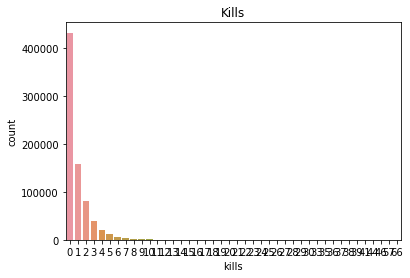

In [12]:
sns.countplot(data=data, x=data['kills']).set_title('Kills')
plt.show()

위 그래프에서도 보듯, 두 자릿수의 킬을 기록한 플레이어들이 간혹 존재한다.

정말 운이 좋아 20킬대까지는 기록할 수 있겠지만,
일반적인 플레이에서 30킬이상 기록하기는 불가능하다고 판단한다.

세계적인 배틀그라운드 선수들도 개인 최다킬이 30킬 이하인 것을 보면,
30킬 이상은 비정상적인 기록일 가능성이 높다.

즉, 만약 30킬 이상 기록했을 경우 불법프로그램을 사용했거나,
해당 매치를 조작하였을 수도 있다.

30킬 이상 기록한 플레이어들을 확인해보자.

In [13]:
print(data[data['kills'] > 30].shape)
pd.options.display.max_columns = None
display(data[data['kills'] > 30].head())

(18, 37)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving
25129,e3f0e0d526f546,33825a2248aa91,0287a3001f1447,1,0,3176.0,0,26,1,1,0,36,11,193.30,630,normal-squad-fpp,8,8,1500,0,0.0,0,0.0,0,0,98.04,16,0,0.8571,40,57.60,5081.60,12.80,1008.00,1,98.04,False
27920,50498d3be0e3bc,5bd6eccf63c4bc,17dea22cefe62a,7,0,2978.0,0,7,6,4,0,35,2,119.40,1798,normal-duo-fpp,15,12,1500,0,133.6,0,0.0,1,0,1114.00,60,0,0.7857,28,60.20,5122.16,25.80,3092.56,6,1247.60,False
114740,cded220c6ebb60,6f303ac6866f52,1e573980b3ee3c,10,0,4198.0,0,7,2,1,1000,38,4,80.95,1559,normal-squad-fpp,7,7,0,0,0.0,0,0.0,0,0,106.40,60,1500,0.8333,32,63.84,7052.64,11.76,2619.12,2,106.40,False
164253,6874be9215646b,af1d17223258d0,0f09bd72c4ba97,1,0,3006.0,0,9,18,2,1000,33,2,150.30,1794,normal-squad-fpp,8,8,-1,0,0.0,0,0.0,0,0,557.50,20,1500,0.4286,28,56.76,5170.32,13.76,3085.68,18,557.50,False
291021,7b4bb8449d2034,8e49d8c6b404ab,17c643ab998ecb,10,0,3679.0,0,12,2,3,1000,36,3,78.61,1792,normal-solo,7,6,-1,0,0.0,0,0.0,0,0,86.56,70,1500,0.6667,8,69.12,7063.68,13.44,3440.64,2,86.56,False


30킬 이상을 기록한 플레이어들은 18명이 있었고,
킬 수에 비해, 총 이동 거리가 너무 적거나, 최장 킬 거리가 비정상적으로 짧은 경우들이 있다.
또, 전투를 많이한 것에 비해 체력 회복 아이템을 너무 적게 사용한 것은
정상적이지 않아보인다.

이러한 플레이어들의 데이터는 정상적이지 않다고 판단하여 삭제하도록 한다.

In [14]:
# 킬 수가 30이상인 플레이어들 삭제
data.drop(data[data['kills'] > 30].index, inplace=True)

### 이상한 데이터 걸러내기 (헤드샷 비율 100%)

헤드샷은 데미지가 더 들어가기 때문에, 더 빨리 적을 제압할 수 있다.
하지만, 움직이는 적의 머리를 노리는 것은 매우 어렵다.

만약 헤드샷 비율이 높은 플레이어가 있다면,
이 또한 불법프로그램 사용으로 의심할 수 있다.

In [15]:
# 'headshot_rate' column 생성
data['headshot_rate'] = data['headshotKills'] / data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)

c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


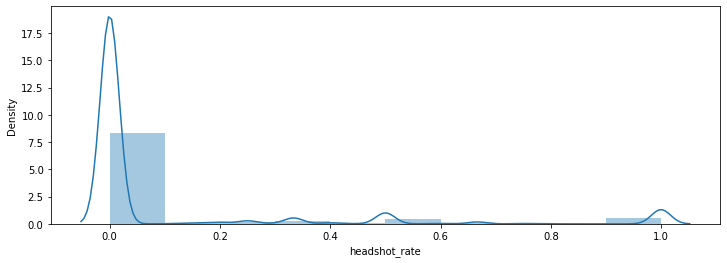

In [16]:
plt.figure(figsize=(12,4))
sns.distplot(data['headshot_rate'], bins=10)
plt.show()

헤드샷 비율이 100%인 플레이어들이 존재한다.
하지만 이 때, 단순히 헤드샷 비율이 100%라 하여 불법프로그램 사용으로 의심하면 안된다.

예를들어 킬 수가 1일 때, 헤드샷 비율이 100%인 것은 정상적인 플레이어로 생각할 수 있다.

따라서 그 기준을 킬 수 10으로 둔다.

대부분 플레이어들의 킬 수가 10킬 이하, 헤드샷 비율이 10% 이하인 점을 생각하면,
킬 수 10 이상에 헤드샷 비율이 100%면, 비정상적인 플레이어로 충분히 판단할 수 있을 것이다.

In [17]:
print(data[(data['headshot_rate'] == 1) & (data['kills'] >= 10)].shape)
pd.options.display.max_columns = None
display(data[(data['headshot_rate'] == 1) & (data['kills'] >= 10)].head())

(1, 38)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
539141,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,0,12,2,443.0,1730,squad-fpp,28,28,1560,0,2048.0,0,0.0,0,0,3915.0,5,0,1.0,93,12.84,1411.33,29.96,1851.1,6,5963.0,False,1.0


헤드샷 비율이 100%인데다가 킬 수가 10이상인 플레이어는 딱 1명있었다.
해당 플레이어를 삭제하자.

In [18]:
# 헤드샷 비율이 100% 인데다가, 킬 수가 10이상인 플레이어들 삭제
data.drop(data[(data['headshot_rate'] == 1) & (data['kills'] >= 10)].index, inplace=True)

### 이상한 데이터 걸러내기 (너무 먼 거리에서 Kill)

'longestKill' 의 분포를 나타내보면 다음과 같다.

c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


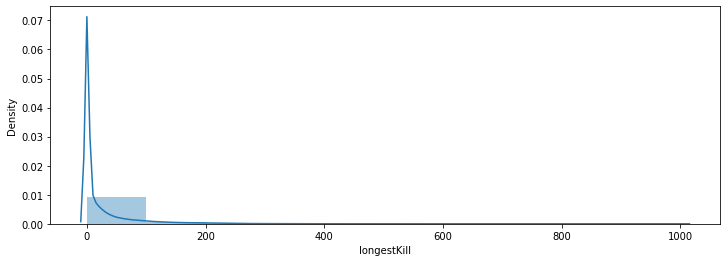

In [19]:
plt.figure(figsize=(12,4))
sns.distplot(data['longestKill'], bins=10)
plt.show()

대부분의 플레이어들이 100미터이하에서 longestKill을 기록하였다.

만약 1km 거리에서 kill을 기록한 플레이어가 있다면, 불법프로그램 사용으로 의심된다.
사용자의 모니터 상에서 사실상 1km 거리의 적들은 보이지 않기 때문이다.

1km 이상에서 kill을 기록한 플레이어를 확인해보자.

In [20]:
print(data[data['longestKill'] >= 1000].shape)
pd.options.display.max_columns = None
display(data[data['longestKill'] >= 1000].head())

(2, 38)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
83492,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,1000,16,4,1000.0,1091,normal-squad-fpp,6,6,-1,4,0.0,0,0.0,0,0,29.21,30,1500,0.6,41,25.44,2241.90,9.54,1734.69,0,29.21,False,0.312500
250618,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,0,23,2,1005.0,1798,normal-duo-fpp,15,12,1500,0,0.0,0,0.0,0,0,235.30,41,0,0.5,28,39.56,3617.16,25.80,3092.56,13,235.30,False,0.173913


1km 이상에서 kill을 기록한 플레이어는 2명이다.

이 2명의 플레이어는 불법프로그램을 사용했을 가능성이 높으므로
데이터셋에서 제외시킨다.

In [21]:
# 1km 이상에서 kill을 기록한 플레이어들 삭제
data.drop(data[data['longestKill'] >= 1000].index, inplace=True)

### 이상한 데이터 걸러내기 (이동 거리가 너무 긴 플레이어)

이동거리가 비정상적으로 많은 플레이어는

불법프로그램 사용이라기 보다 매치에 제대로 참여하지 않고,

그냥 여행을 좋아하는 플레이어들이다.

이런 데이터는 모델의 성능을 떨어트릴 수 있으므로 제외시킨다.

#### walkDistance

c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


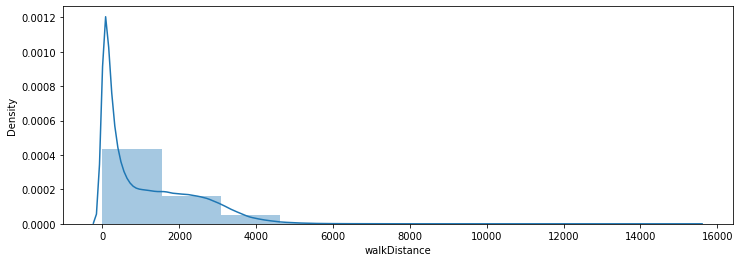

In [22]:
plt.figure(figsize=(12,4))
sns.distplot(data['walkDistance'], bins=10)
plt.show()

In [23]:
print(data[data['walkDistance'] >= 10000].shape)
pd.options.display.max_columns = None
display(data[data['walkDistance'] >= 10000].head())

(29, 38)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
586,9664eaac46b9b3,05f35dff80df96,00c8ba4b170f30,0,1,140.90,1,1,1,24,0,1,1,79.39,1717,squad-fpp,30,29,1438,0,331.9000,0,34.27,0,0,10520.0,10,0,0.8276,98,1.02,143.7180,30.60,1751.34,2,10886.1700,False,1.0
2451,ad4a497c7033c9,2133b9bd0b5277,21742d6d2ddd2e,0,4,0.00,0,0,6,37,0,0,0,0.00,1853,duo,47,43,1507,1,1706.0000,0,422.40,0,0,11690.0,4,0,0.9130,92,0.00,0.0000,50.76,2001.24,10,13818.4000,False,0.0
26597,0296906719778f,f43b429c7d8189,280d8a714d16c2,0,0,0.00,0,0,0,52,0,0,0,0.00,1881,solo,95,92,1505,0,0.0041,0,11.64,0,0,10980.0,3,0,0.7128,95,0.00,0.0000,99.75,1975.05,0,10991.6441,False,0.0
41805,afd4b057c8eb1e,65a4f4ecfb1a6e,0f0ebe723cbe7c,0,1,77.01,0,0,1,46,1246,0,0,0.00,1672,squad-fpp,29,29,-1,0,0.0251,0,108.70,0,0,12730.0,5,1631,0.7857,97,0.00,79.3203,29.87,1722.16,2,12838.7251,False,0.0
81014,a4e83905ff7845,04fb9c46a556df,2289a391592aef,0,0,125.40,1,0,0,47,0,0,0,0.00,1891,duo-fpp,47,46,1491,3,0.0154,0,30.12,0,0,12160.0,3,0,0.7174,93,0.00,134.1780,50.29,2023.37,0,12190.1354,False,0.0


In [24]:
# 걸어다닌 거리가 10000 이상인 플레이어들은 삭제
data.drop(data[data['walkDistance'] >= 10000].index, inplace=True)

#### rideDistance

c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


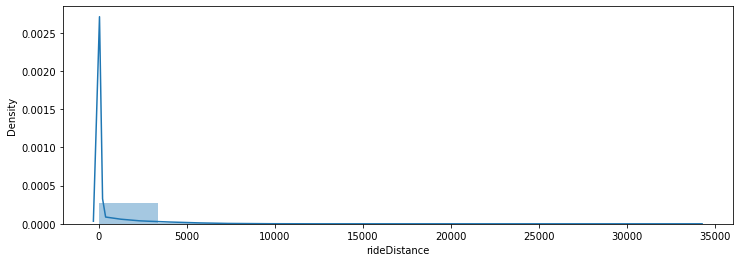

In [25]:
plt.figure(figsize=(12,4))
sns.distplot(data['rideDistance'], bins=10)
plt.show()

In [26]:
print(data[data['rideDistance'] >= 20000].shape)
pd.options.display.max_columns = None
display(data[data['rideDistance'] >= 20000].head())

(23, 38)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
6146,fbbade598dbf6b,7c07de03a00420,1fabfaca20c136,0,1,82.71,0,0,8,46,1403,0,0,0.00,1964,solo-fpp,96,94,0,0,26230.0,0,0.0,1,0,820.9,5,1428,0.9263,96,0.00,86.0184,99.84,2042.56,9,27050.9,False,0.0
23530,df746138c66db5,737f6cc8d9a082,1ee9a020feede7,0,2,47.43,2,0,5,17,0,2,1,149.30,1803,squad,28,28,1548,0,20170.0,0,0.0,0,0,448.3,4,0,0.6296,97,2.06,48.8529,28.84,1857.09,7,20618.3,False,0.0
23783,2a7685b9ddc0c4,7f56294646146d,23715989597605,0,0,90.93,0,0,1,52,1438,0,0,0.00,1977,duo-fpp,47,45,-1,1,23400.0,0,0.0,0,0,704.6,6,1545,0.6957,93,0.00,97.2951,50.29,2115.39,1,24104.6,False,0.0
67539,4c12e3ffdbdfbc,3a18539cdca4d3,0ae61a4ba3d60e,0,1,278.30,2,0,1,9,1497,3,2,64.25,1784,duo-fpp,43,41,-1,1,20610.0,0,0.0,0,0,1302.0,4,1590,0.7381,86,3.42,317.2620,49.02,2033.76,2,21912.0,False,0.0
99414,18379ee68117cb,3a18539cdca4d3,0ae61a4ba3d60e,1,3,245.60,2,0,2,26,1498,1,1,97.50,1784,duo-fpp,43,41,-1,0,20440.0,0,0.0,0,1,972.9,5,1594,0.7381,86,1.14,279.9840,49.02,2033.76,5,21412.9,False,0.0


In [27]:
# 오토바이나 자동차를 타고 간 거리가 20000 이상인 플레이어들은 삭제
data.drop(data[data['rideDistance'] >= 20000].index, inplace=True)

#### rideDistance

c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


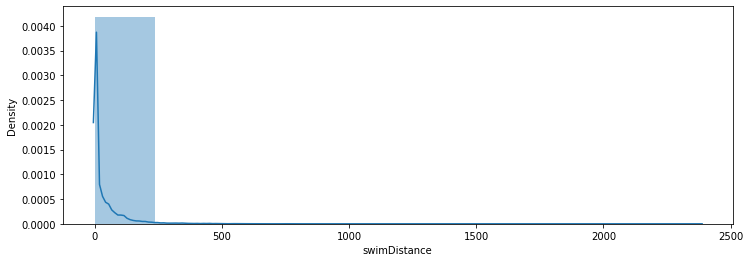

In [28]:
plt.figure(figsize=(12,4))
sns.distplot(data['swimDistance'], bins=10)
plt.show()

In [29]:
print(data[data['swimDistance'] >= 2000].shape)
pd.options.display.max_columns = None
display(data[data['swimDistance'] >= 2000].head())

(1, 38)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
309122,2496e3223a8b5d,78980ab36f7642,23ec7dd5546022,0,0,0.0,0,0,0,83,0,0,0,0.0,1400,duo,48,45,1509,0,0.0,0,2382.0,0,0,1534.0,0,0,0.0851,95,0.0,0.0,50.4,1470.0,0,3916.0,False,0.0


In [30]:
data.drop(data[data['swimDistance'] >= 2000].index, inplace=True)

### 이상한 데이터 걸러내기 (아이템 획득 수 또는 사용 수가 많은 플레이어)

무기나 구급상자, 에너지 드링크 등의 아이템 획득 수 및 아이템 사용 수가 비정상적으로 많은 플레이어들이 있다.

해당 플레이어들을 데이터셋에서 제외시키자

#### weaponsAcquired

c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


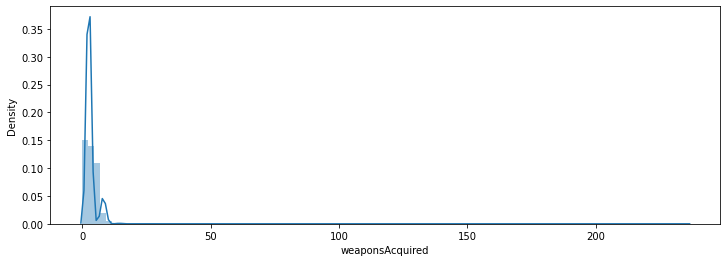

In [31]:
plt.figure(figsize=(12,4))
sns.distplot(data['weaponsAcquired'], bins=100)
plt.show()

In [32]:
print(data[data['weaponsAcquired'] >= 50].shape)
pd.options.display.max_columns = None
display(data[data['weaponsAcquired'] >= 50].head())

(26, 38)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
7345,3f2bcf53b108c4,2dbc013e849f5a,1df2560f0937ab,0,1,85.85,0,0,2,55,1664,0,0,0.00,1928,squad-fpp,29,28,-1,0,4778.0,0,0.0,0,0,2112.0,236,1553,0.6786,99,0.00,86.7085,29.29,1947.28,3,6890.0,False,0.000000
53985,6eb30a91f1b807,ab341810088269,1e573980b3ee3c,10,0,1694.00,0,3,2,15,1000,16,2,33.57,1559,normal-squad-fpp,7,7,0,0,2958.0,0,0.0,1,0,1066.0,59,1500,0.6667,32,26.88,2845.9200,11.76,2619.12,2,4024.0,False,0.187500
64299,6960550b7f37b2,65bcc1e5d4f168,17dea22cefe62a,7,0,2028.00,0,5,6,15,0,18,2,90.26,1798,normal-duo-fpp,15,12,1500,0,0.0,0,0.0,0,0,274.5,63,0,0.5714,28,30.96,3488.1600,25.80,3092.56,6,274.5,False,0.277778
110437,4fe1c1b84d0e4c,62bc19a85c2ed8,17dea22cefe62a,3,0,2651.00,0,3,3,9,0,24,3,31.00,1798,normal-duo-fpp,15,12,1500,0,3621.0,0,0.0,0,0,1024.0,71,0,0.9286,28,41.28,4559.7200,25.80,3092.56,3,4645.0,False,0.125000
115383,0c106b75411a42,478c94d4a16538,0f09bd72c4ba97,5,0,840.40,0,4,17,20,1000,6,1,136.40,1794,normal-squad-fpp,8,8,-1,0,0.0,0,0.0,0,0,1308.0,50,1500,1.0000,28,10.32,1445.4880,13.76,3085.68,17,1308.0,False,0.666667


In [33]:
data.drop(data[data['weaponsAcquired'] >= 50].index, inplace=True)

#### heals

c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


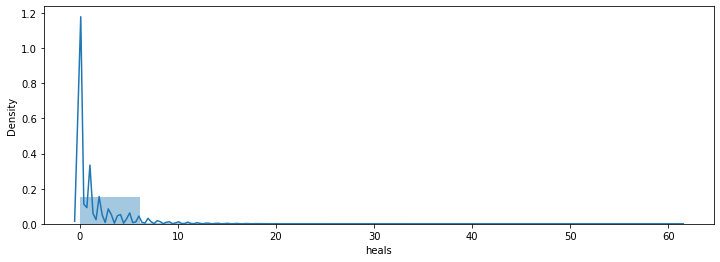

In [34]:
plt.figure(figsize=(12,4))
sns.distplot(data['heals'], bins=10)
plt.show()

In [35]:
print(data[data['heals'] >= 50].shape)
pd.options.display.max_columns = None
display(data[data['heals'] >= 50].head())

(7, 38)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
5403,edfd3c24340b50,86a65f3b07a416,298a1428dc889f,0,5,152.2,2,1,52,23,0,1,1,137.70,1315,squad,27,26,1437,1,693.5,0,0.00,1,0,1882.0,6,0,0.9231,88,1.12,170.464,30.24,1472.80,57,2575.50,False,1.0
14421,d124f43ee5d74f,dd2f436c57ca92,15154e6d9e5333,0,2,94.5,0,1,55,10,0,2,1,74.17,1855,squad-fpp,28,27,1761,0,1846.0,0,0.00,1,0,2117.0,8,0,0.8148,92,2.16,102.060,30.24,2003.40,57,3963.00,False,0.5
139962,3a2ee4b92ec5b5,acecc529eddc06,12f66105afeb30,0,6,100.0,0,0,55,21,0,1,1,13.50,1940,solo-fpp,96,92,1533,0,5426.0,0,0.00,0,0,1364.0,5,0,0.9053,96,1.04,104.000,99.84,2017.60,61,6790.00,False,0.0
159097,26581a46d6ff21,4d2b612b7a2ceb,145fcbcd6748db,0,4,0.0,0,0,51,44,0,0,0,0.00,1745,squad-fpp,28,27,1529,0,2416.0,0,25.96,0,0,3992.0,4,0,0.7778,99,0.00,0.000,28.28,1762.45,55,6433.96,False,0.0
483615,278331085df640,7445d528b51702,00c6ce68aebd56,0,4,0.0,0,0,56,45,1323,0,0,0.00,1356,solo-fpp,96,94,-1,0,191.3,0,93.94,0,0,2063.0,3,1898,0.9579,96,0.00,0.000,99.84,1410.24,60,2348.24,False,0.0


In [36]:
data.drop(data[data['heals'] >= 50].index, inplace=True)

#### boosts

c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


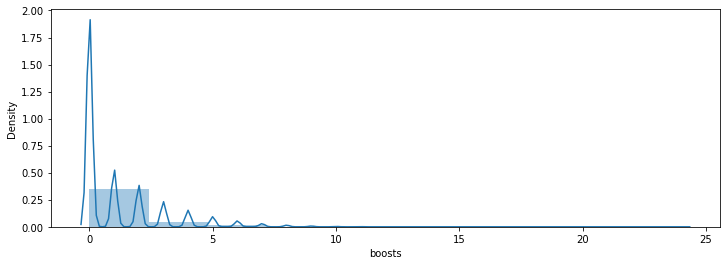

In [37]:
plt.figure(figsize=(12,4))
sns.distplot(data['boosts'], bins=10)
plt.show()

In [38]:
print(data[data['boosts'] >= 20].shape)
pd.options.display.max_columns = None
display(data[data['boosts'] >= 20].head())

(2, 38)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
165387,1d85e9f3c46f1a,922edc8b32c161,0b5bd195ccd136,0,24,746.3,0,4,1,2,1415,7,1,182.9,1907,solo-fpp,90,85,-1,0,2175.0,0,0.0,0,0,3650.0,4,1562,0.9663,90,7.70,820.930,99.00,2097.70,25,5825.0,False,0.571429
678517,61af2d1c46b9b9,27cee0e5fcac6b,004760d4b1aa7e,2,23,522.4,2,2,7,4,1738,4,2,314.4,1832,squad-fpp,27,25,-1,0,1760.0,0,0.0,0,0,2793.0,3,1661,0.9231,93,4.28,558.968,28.89,1960.24,30,4553.0,False,0.500000


In [39]:
data.drop(data[data['boosts'] >= 20].index, inplace=True)

### 현재 남아있는 데이터셋

In [40]:
data.shape

(759156, 38)

### 'matchType' one hot encoding

In [41]:
print("데이터셋에는 {} 가지 서로 다른 매치 타입들이 있다.".format(data["matchType"].nunique()))

데이터셋에는 14 가지 서로 다른 매치 타입들이 있다.


In [42]:
# 'matchType' one hot encoding
data = pd.get_dummies(data, columns=["matchType"])

# 인코딩된 matchType 확인하기
matchType_encoding = data.filter(regex="matchType")
matchType_encoding.head()

,matchType_crashfpp,matchType_duo,matchType_duo-fpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### 'groupId', 'matchId' categorical type 으로 변환

In [43]:
# 우선 categorical type으로 변환
data['groupId'] = data['groupId'].astype('category')
data['matchId'] = data['matchId'].astype('category')

# 카테고리 코드 가져오기
data['groupId_cat'] = data['groupId'].cat.codes
data['matchId_cat'] = data['matchId'].cat.codes

# 필요없는 column 제거
data.drop(columns=['groupId', 'matchId', 'Id'], inplace=True)

# 결과 확인
data[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,221370,206
1,253655,6124
2,114228,1096
3,135388,2195
4,282023,1535


# Machine Learning (Random Forest)

In [44]:
# data와 target 나누기

X = data.drop(columns = ['winPlacePerc'])
y = data['winPlacePerc']

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# training data, validation data 나누기
# X_train, X_valid, y_train, y_valid = train_test_split(X, y)   # Memory error 남
def split_vals(a, n : int): 
    return a[:n].copy(), a[n:].copy()
val_perc = 0.33
n_valid = int(val_perc * len(data)) 
n_train = len(data)-n_valid
# Split dataset
X_train, X_valid = split_vals(X, n_train)
y_train, y_valid = split_vals(y, n_train)

In [46]:
# Random Forest
rf = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
rf.fit(X_train, y_train)

result = rf.predict(X_valid)
error = mean_absolute_error(result, y_valid) 
print("validation error :", error)

validation error : 0.060990858152993044


## Feature Importance

In [47]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(rf, X)
fi[:10]

,cols,imp
21,walkDistance,0.250469
6,killPlace,0.220493
30,totalDistance,0.138967
1,boosts,0.074098
22,weaponsAcquired,0.059937
29,healsandboosts,0.050032
5,heals,0.039672
10,longestKill,0.027284
25,killsNorm,0.014801
16,rideDistance,0.012721


<AxesSubplot:ylabel='cols'>

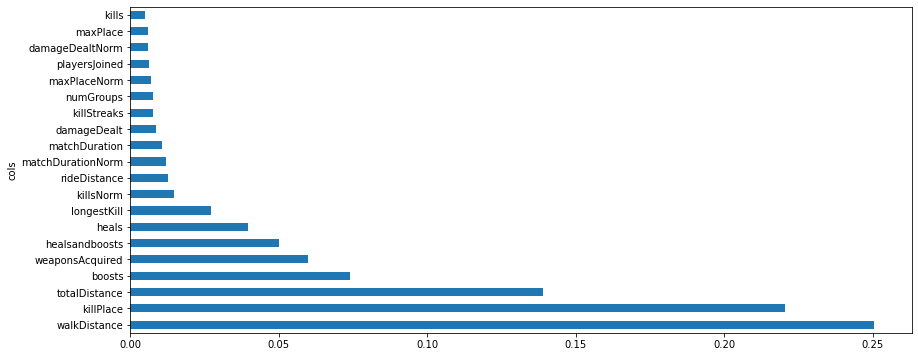

In [48]:
plot1 = fi[:20].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh')
plot1

In [49]:
to_keep = fi[fi.imp>0.005].cols
print('Significant features: ', len(to_keep))
to_keep

Significant features:  19


21         walkDistance
6             killPlace
30        totalDistance
1                boosts
22      weaponsAcquired
29       healsandboosts
5                 heals
10          longestKill
25            killsNorm
16         rideDistance
28    matchDurationNorm
11        matchDuration
2           damageDealt
9           killStreaks
13            numGroups
27         maxPlaceNorm
24        playersJoined
26      damageDealtNorm
12             maxPlace
Name: cols, dtype: object

In [50]:
X_keep = X[to_keep].copy()
X_train, X_valid = split_vals(X_keep, n_train)

In [51]:
rf2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt', n_jobs=-1)
rf2.fit(X_train, y_train)

result = rf2.predict(X_valid)
score = mean_absolute_error(result, y_valid)
print("validation error :", score)

validation error : 0.05923002359272681


# 테스트 데이터셋 불러오기 (존버, 여포 플레이어 데이터셋)

In [52]:
pas = pd.read_csv("./passive_style.csv")
agg = pd.read_csv("./aggressive_style.csv")

In [53]:
# NaN 값확인
pas.isnull().any()

Unnamed: 0         False
Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
dtype: bool

In [54]:
# NaN 값확인
agg.isnull().any()

Unnamed: 0         False
Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
dtype: bool

In [55]:
# 데이터 shape 확인하기
print("Shape of dataset (passive): ", pas.shape)
print("Shape of dataset (aggressive): ", agg.shape)

Shape of dataset (passive):  (50000, 29)
Shape of dataset (aggressive):  (50000, 29)


In [56]:
# test set 일단 합치기
test = pd.concat([pas, agg])

In [57]:
# playersJoined 열 추가
test['playersJoined'] = test.groupby('matchId')['matchId'].transform('count')

In [58]:
# normalize
test['killsNorm'] = test['kills']*((100-test['playersJoined'])/100 + 1)
test['damageDealtNorm'] = test['damageDealt']*((100-test['playersJoined'])/100 + 1)
test['maxPlaceNorm'] = test['maxPlace']*((100-test['playersJoined'])/100 + 1)
test['matchDurationNorm'] = test['matchDuration']*((100-test['playersJoined'])/100 + 1)

In [59]:
# Heals and Boosts 열 추가
test['healsandboosts'] = test['heals'] + test['boosts']

In [60]:
# TotalDistance 열 추가
test['totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']
# killsWithoutMoving 열 추가
test['killsWithoutMoving'] = ((test['kills'] > 0) & (test['totalDistance'] == 0))

In [61]:
# Headshot_rate 열 추가
test['headshot_rate'] = test['headshotKills'] / test['kills']
test['headshot_rate'] = test['headshot_rate'].fillna(0)

In [62]:
test.shape

(100000, 38)

In [63]:
# matchType one hot encoding
test = pd.get_dummies(test, columns=["matchType"])

# 'groupId', 'matchId' categorical type 으로 변환
# 우선 categorical type으로 변환
test['groupId'] = test['groupId'].astype('category')
test['matchId'] = test['matchId'].astype('category')
# 카테고리 코드 가져오기
test['groupId_cat'] = test['groupId'].cat.codes
test['matchId_cat'] = test['matchId'].cat.codes
# 필요없는 column 제거
test.drop(columns=['groupId', 'matchId', 'Id'], inplace=True)
test = test[to_keep]

In [64]:
# 다시 passive style과 aggressive style 로 나누기

pas = test[:50000]
agg = test[50001:]

# 존버 vs 여포 시뮬레이션 

In [65]:
pas_result = rf2.predict(pas)
agg_result = rf2.predict(agg)

존버 플레이어 평균 등 수 : 38.39763860712277
여포 플레이어 평균 등 수 : 19.901740321293826


c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


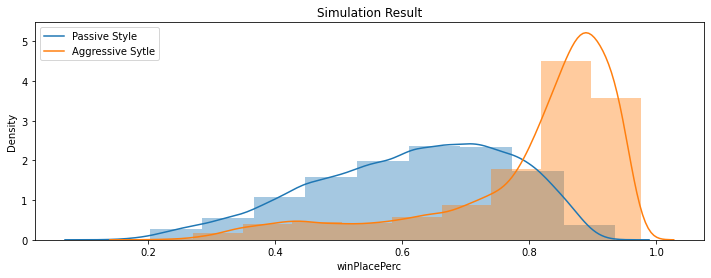

In [66]:
import numpy as np

print("존버 플레이어 평균 등 수 :", np.mean(100 - pas_result*100))
print("여포 플레이어 평균 등 수 :", np.mean(100 - agg_result*100))

plt.figure(figsize=(12,4))
plt.title("Simulation Result")
plt.xlabel("winPlacePerc")
sns.distplot(pas_result, bins=10)
sns.distplot(agg_result, bins=10)
plt.legend(["Passive Style", "Aggressive Sytle"])
plt.show()

## 주요 feature 비교

존버 플레이어 평균 걸어간 거리 : 2384.85102
여포 플레이어 평균 걸어간 거리 : 2438.889973699474


c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


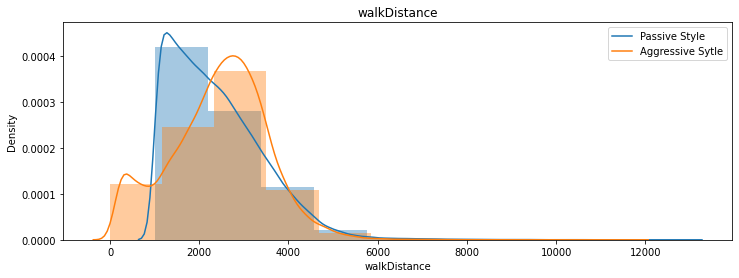

In [67]:
print("존버 플레이어 평균 걸어간 거리 :", np.mean(pas["walkDistance"]))
print("여포 플레이어 평균 걸어간 거리 :", np.mean(agg["walkDistance"]))

plt.figure(figsize=(12,4))
plt.title("walkDistance")
plt.xlabel("walkDistance")
sns.distplot(pas["walkDistance"], bins=10)
sns.distplot(agg["walkDistance"], bins=10)
plt.legend(["Passive Style", "Aggressive Sytle"])
plt.show()

존버 플레이어 킬 순위 : 35.26842
여포 플레이어 킬 순위 : 3.7854757095141904


c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


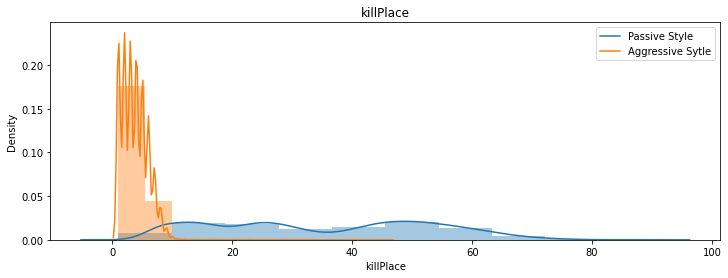

In [68]:
print("존버 플레이어 킬 순위 :", np.mean(pas["killPlace"]))
print("여포 플레이어 킬 순위 :", np.mean(agg["killPlace"]))

plt.figure(figsize=(12,4))
plt.title("killPlace")
plt.xlabel("killPlace")
sns.distplot(pas["killPlace"], bins=10)
sns.distplot(agg["killPlace"], bins=10)
plt.legend(["Passive Style", "Aggressive Sytle"])
plt.show()

존버 플레이어 아이템 획득 : 1.99696
여포 플레이어 아이템 획득 : 3.751055021100422


c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


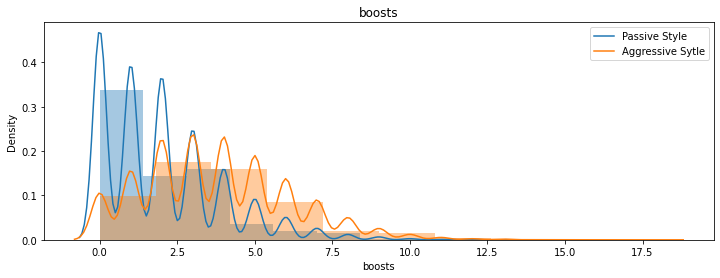

In [69]:
print("존버 플레이어 아이템 획득 :", np.mean(pas["boosts"]))
print("여포 플레이어 아이템 획득 :", np.mean(agg["boosts"]))

plt.figure(figsize=(12,4))
plt.title("boosts")
plt.xlabel("boosts")
sns.distplot(pas["boosts"], bins=10)
sns.distplot(agg["boosts"], bins=10)
plt.legend(["Passive Style", "Aggressive Sytle"])
plt.show()

존버 플레이어 가한 데미지량 : 267.14577848128005
여포 플레이어 가한 데미지량 : 1092.3587326406528


c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\bang\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


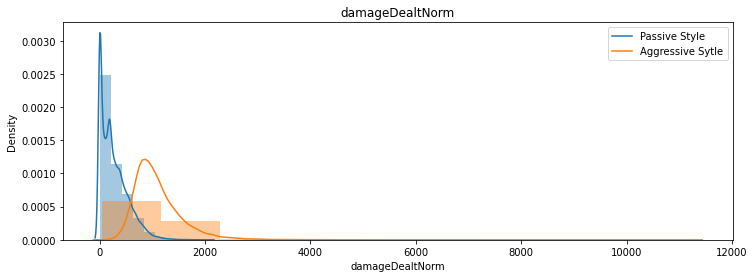

In [70]:
print("존버 플레이어 가한 데미지량 :", np.mean(pas["damageDealtNorm"]))
print("여포 플레이어 가한 데미지량 :", np.mean(agg["damageDealtNorm"]))

plt.figure(figsize=(12,4))
plt.title("damageDealtNorm")
plt.xlabel("damageDealtNorm")
sns.distplot(pas["damageDealtNorm"], bins=10)
sns.distplot(agg["damageDealtNorm"], bins=10)
plt.legend(["Passive Style", "Aggressive Sytle"])
plt.show()

50000 명의 존버 스타일의 플레이어와 50000 명의 여포 스타일의 플레이어의 데이터셋을 이용하여 시뮬레이션 한 결과,

여포 스타일의 플레이어가 대부분 상위권에 위치함을 확인하였다.

존버 스타일의 플레이의 경우 항상 여포 스타일의 플레이어한테 타겟이 될 수 밖에 없고

또, 존버는 여포에 비해 게임 실력이 많이 요구되지 않으므로 상대적으로 실력이 낮을 수 밖에 없다.

여포 스타일의 플레이어는 기본적으로 게임을 잘하기 때문에, 매치를 더 유리하게 끌고 갈 수 있지 않나 하는 생각이 든다.

결론은 배틀그라운드 게임에서 상위권이 되고 싶다면, 실력을 키워 여포 스타일로 운영을 하는 것이 더 좋을 것이다.